In [3]:
import pandas as pd 
import numpy as np 
from sklearn.datasets import load_diabetes




# Diabetes dataset

In [4]:
X, y = load_diabetes(return_X_y=True)

In [5]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [6]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [7]:
# print column names of X
print(load_diabetes().feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [10]:
colnames = load_diabetes().feature_names
# print column names of y
print(load_diabetes().DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [11]:
data = pd.DataFrame(X, columns=colnames)
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [30]:
data.sum(axis = 0)

age   -6.383782e-16
sex    1.124101e-15
bmi   -9.971191e-14
bp    -2.145506e-14
s1    -6.314393e-15
s3    -2.664535e-15
s4    -7.903400e-15
s5     4.085621e-14
s6     5.974821e-15
dtype: float64

In [34]:
data.isnull().sum(axis = 1)

0      0
1      0
2      0
3      0
4      0
      ..
437    0
438    0
439    0
440    0
441    0
Length: 442, dtype: int64

<AxesSubplot: >

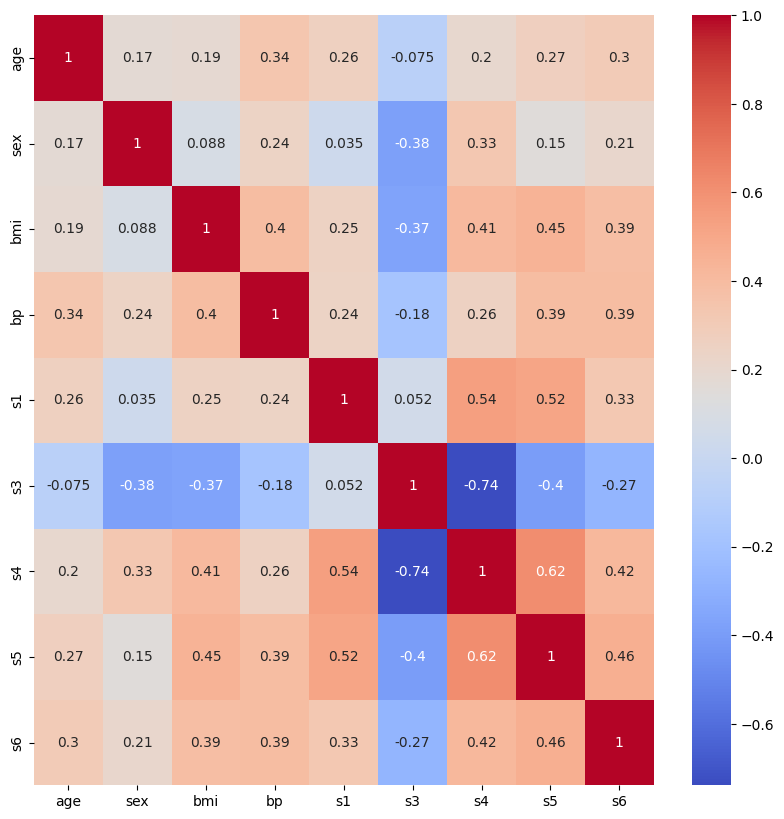

In [36]:
# find collinearity in the dataset
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot = True, cmap='coolwarm')


In [20]:
# we see the s1 and s2 are highly correlated. So we will drop s2
data.drop('s2', axis = 1, inplace = True)


In [37]:
# now do linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X, y)

# print intercept and coefficients
print(model.intercept_)
print(model.coef_)
print(model.score(X, y))


152.13348416289597
[ -10.0098663  -239.81564367  519.84592005  324.3846455  -792.17563855
  476.73902101  101.04326794  177.06323767  751.27369956   67.62669218]
0.5177484222203499


In [23]:
vmodel = LinearRegression()
model.fit(data.values, y)

# print intercept and coefficients
print(model.intercept_)
print(model.coef_)
print(model.score(data.values, y))

152.13348416289602
[  -6.50767408 -236.17412787  528.62222307  322.24012905 -228.547094
 -125.36073251  146.14676177  536.10087492   69.11211362]
0.5155359375990978


In [25]:
print(r2_score(y, model.predict(data.values)))

0.5155359375990978


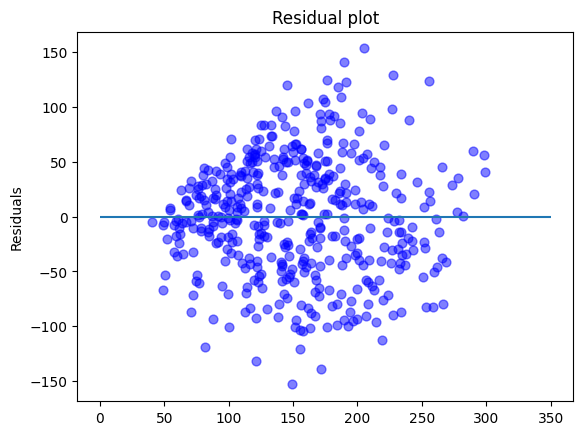

In [27]:
# plot the residuals
plt.scatter(model.predict(data.values), model.predict(data.values) - y, c='b', s=40, alpha=0.5)
plt.hlines(y = 0, xmin = 0, xmax = 350)
plt.title('Residual plot')
plt.ylabel('Residuals')
plt.show()


In [28]:
# show mean squared error
print(mean_squared_error(y, model.predict(data.values)))


2872.8161267269597


In [29]:
np.sqrt(mean_squared_error(y, model.predict(data.values)))

53.59865788176939